# Generate weekly statistics (mean, median, mode) for number of cases and deaths across North Carolina

### Import pandas to read the excel data, Plotly to graph the data, and Image to use static images

In [1]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import Image
import plotly.express as px
import numpy as np

### Read the Cases dataset using pandas

In [2]:
cases = pd.read_csv('../../Team/covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


### Read the Deaths dataset using pandas

In [3]:
deaths = pd.read_csv("../../Team/covid_deaths_usafacts.csv")
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


### Since COVID dataset is huge, we will focus the analysis on selected dates, starts from 2020, July - 2020, December for the Cases dataset

In [4]:
selected_date_columns = [col for col in cases.columns if '2020-07-01' <= col <= '2020-12-31']
additional_columns = ["countyFIPS", "County Name", "State", "StateFIPS"]
selected_columns = additional_columns + selected_date_columns
selected_cases = cases[selected_columns]

selected_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,553,561,568,591,615,618,...,3841,3889,3942,3990,3999,4029,4065,4105,4164,4190
2,1003,Baldwin County,AL,1,703,751,845,863,881,911,...,12155,12321,12521,12666,12708,12825,12962,13172,13392,13601
3,1005,Barbour County,AL,1,326,335,348,350,352,356,...,1363,1383,1390,1396,1398,1406,1417,1462,1492,1514
4,1007,Bibb County,AL,1,174,179,189,190,193,197,...,1660,1683,1711,1725,1739,1746,1762,1792,1817,1834


### Since COVID dataset is huge, we will focus the analysis on selected dates, starts from 2020, July - 2020, December for the Deaths dataset

In [5]:
selected_date_columns = [col for col in deaths.columns if '2020-07-01' <= col <= '2020-12-31']
additional_columns = ["countyFIPS", "County Name", "State", "StateFIPS"]
selected_columns = additional_columns + selected_date_columns
selected_deaths = deaths[selected_columns]

selected_deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,12,13,13,13,13,13,...,44,46,46,46,46,47,47,47,48,48
2,1003,Baldwin County,AL,1,10,10,10,10,10,10,...,149,151,151,151,151,152,152,156,160,161
3,1005,Barbour County,AL,1,1,1,2,2,2,2,...,32,32,32,32,32,32,32,32,32,32
4,1007,Bibb County,AL,1,1,1,1,1,1,1,...,42,42,42,42,42,42,42,42,46,46


### Now given Cases data for our selected dates, extract all the data where the State is North Carolina (NC)

In [6]:
nc_cases = selected_cases[selected_cases["State"] == "NC"]
nc_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1923,0,Statewide Unallocated,NC,37,3,3,3,0,0,0,...,0,0,0,0,0,0,2,1,38,82
1924,37001,Alamance County,NC,37,1151,1179,1207,1240,1274,1292,...,9509,9509,9509,9509,9509,9509,10120,10164,10274,10397
1925,37003,Alexander County,NC,37,93,101,105,112,118,124,...,2367,2367,2367,2367,2367,2367,2526,2564,2642,2662
1926,37005,Alleghany County,NC,37,32,36,36,36,37,37,...,558,558,558,558,558,558,611,619,633,638
1927,37007,Anson County,NC,37,132,138,142,148,149,155,...,1284,1284,1284,1284,1284,1284,1380,1383,1402,1407


### Create a series/array of sum of cases on each Wednesday from each week across North Carolina

In [7]:
# July 1, 2020 is a Wednesday
count = 2
weekly_cases_nc = [] # where Wednesday from each week is chosen
for col in nc_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_nc.append(nc_cases[col].sum())
weekly_cases_nc_data = pd.Series(weekly_cases_nc)

### Let's plot the Cases

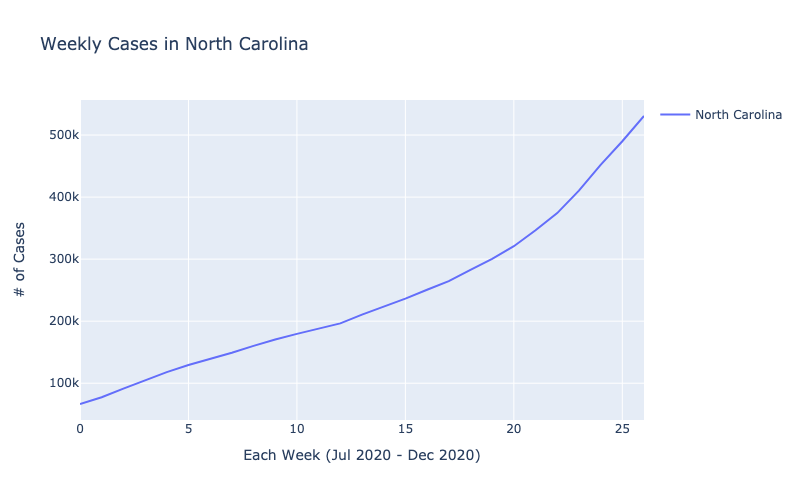

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_cases_nc_data.index, y=weekly_cases_nc_data,
                         mode='lines', name='North Carolina'))

fig.update_layout(
    title='Weekly Cases in North Carolina',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Cases'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("nc_cases.png")
Image(filename="nc_cases.png")

### Generate the Mean for the number of cases across North Carolina

In [9]:
print("The Average/Mean of Cases across North Carolina from July 2020 to December 2020 is",round(weekly_cases_nc_data.mean(), 2))

The Average/Mean of Cases across North Carolina from July 2020 to December 2020 is 239380.59


### Generate the Mode for the number of cases across North Carolina

In [10]:
print("The Mode of Cases across North Carolina from July 2020 to December 2020 is:",weekly_cases_nc_data.mode().values[0])

The Mode of Cases across North Carolina from July 2020 to December 2020 is: 66496


### Generate the Median for the number of cases across North Carolina

In [11]:
print("The Median of Cases across North Carolina from July 2020 to December 2020 is:",int(weekly_cases_nc_data.median()))

The Median of Cases across North Carolina from July 2020 to December 2020 is: 210629


### Now given Deaths data for our selected dates, extract all the data where the State is North Carolina (NC)

In [12]:
nc_deaths = selected_deaths[selected_deaths["State"] == "NC"]
nc_deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1923,0,Statewide Unallocated,NC,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1924,37001,Alamance County,NC,37,37,37,37,37,37,37,...,114,114,114,114,114,114,117,117,117,117
1925,37003,Alexander County,NC,37,1,1,1,1,1,1,...,26,26,26,26,26,26,29,30,30,30
1926,37005,Alleghany County,NC,37,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
1927,37007,Anson County,NC,37,1,1,1,1,1,1,...,19,19,19,19,19,19,23,23,26,26


### Create a series/array of sum of deaths on each Wednesday from each week across North Carolina

In [13]:
count = 2
weekly_deaths_nc = []
for col in nc_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_nc.append(nc_deaths[col].sum())
weekly_deaths_nc_data = pd.Series(weekly_deaths_nc)

### Let's plot the Deaths

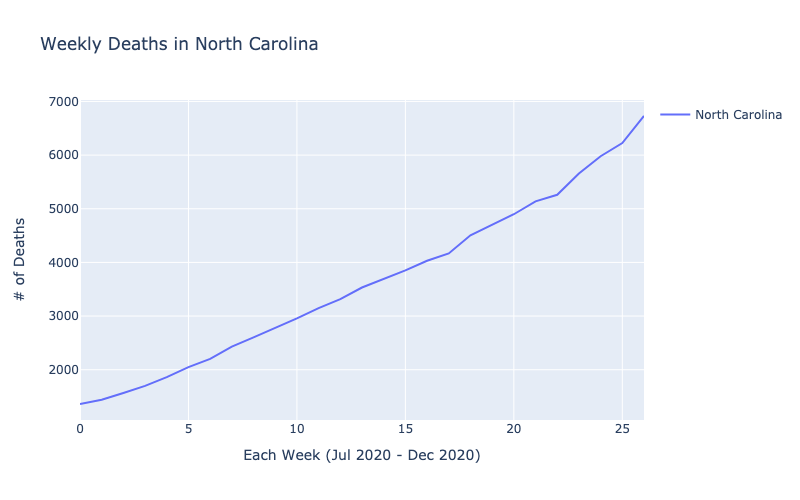

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_deaths_nc_data.index, y=weekly_deaths_nc_data,
                         mode='lines', name='North Carolina'))

fig.update_layout(
    title='Weekly Deaths in North Carolina',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Deaths'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("nc_deaths.png")
Image(filename="nc_deaths.png")

### Generate the Mean for the number of deaths across North Carolina

In [15]:
print("The Average/Mean of Deaths across North Carolina from July 2020 to December 2020 is",round(weekly_deaths_nc_data.mean(), 2))

The Average/Mean of Deaths across North Carolina from July 2020 to December 2020 is 3621.19


### Generate the Mode for the number of deaths across North Carolina

In [16]:
print("The Mode of Deaths across North Carolina from July 2020 to December 2020 is:",weekly_deaths_nc_data.mode().values[0])

The Mode of Deaths across North Carolina from July 2020 to December 2020 is: 1361


### Generate the Median for the number of deaths across North Carolina

In [17]:
print("The Median of Deaths across North Carolina from July 2020 to December 2020 is:",int(weekly_deaths_nc_data.median()))

The Median of Deaths across North Carolina from July 2020 to December 2020 is: 3532


# Compare the data against 5 other states

###  Given Cases data from Jul 2020 to Dec 2020, extract all the data where the State is Florida (FL)

In [18]:
fl_cases = selected_cases[selected_cases["State"] == "FL"]
fl_deaths = selected_deaths[selected_deaths["State"] == "FL"]
fl_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
329,0,Statewide Unallocated,FL,12,167,172,187,201,226,230,...,2975,3023,3036,3036,3067,3080,3088,3082,3062,3010
330,12001,Alachua County,FL,12,1245,1332,1423,1506,1578,1636,...,14981,15074,15182,15182,15370,15420,15473,15574,15674,15866
331,12003,Baker County,FL,12,72,80,84,98,102,106,...,2329,2353,2374,2374,2395,2397,2414,2432,2453,2470
332,12005,Bay County,FL,12,408,581,625,684,713,744,...,10806,10978,11124,11124,11302,11358,11403,11540,11753,11907
333,12007,Bradford County,FL,12,84,89,92,94,95,95,...,1965,2027,2056,2056,2090,2103,2118,2137,2163,2180


### Create a series/array of sum of Cases and Deaths on each Wednesday from each week across Florida

In [19]:
count = 2
weekly_cases_fl = []
for col in fl_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_fl.append(fl_cases[col].sum())
weekly_cases_fl_data = pd.Series(weekly_cases_fl)

count = 2
weekly_deaths_fl = []
for col in fl_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_fl.append(fl_deaths[col].sum())
weekly_deaths_fl_data = pd.Series(weekly_deaths_fl)

### Given Cases data from Jul 2020 to Dec 2020, extract all the data where the State is New York (NY)

In [20]:
ny_cases = selected_cases[selected_cases["State"] == "NY"]
ny_deaths = selected_deaths[selected_deaths["State"] == "NY"]
ny_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1860,0,Statewide Unallocated,NY,36,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
1861,36001,Albany County,NY,36,2112,2125,2130,2145,2152,2160,...,9586,9786,10045,10274,10489,10629,10880,11112,11333,11585
1862,36003,Allegany County,NY,36,61,62,63,63,63,63,...,1607,1627,1662,1693,1719,1731,1748,1762,1782,1831
1863,36005,Bronx County,NY,36,47651,47758,47838,47902,47938,47994,...,76511,77148,77887,78663,79308,79759,80350,81104,81882,82992
1864,36007,Broome County,NY,36,722,729,736,752,753,757,...,7144,7318,7429,7540,7616,7663,7745,7855,8004,8157


### Create a series/array of sum of Cases and Deaths on each Wednesday from each week across New York (NY)

In [21]:
count = 2
weekly_cases_ny = []
for col in ny_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_ny.append(ny_cases[col].sum())
weekly_cases_ny_data = pd.Series(weekly_cases_ny)

count = 2
weekly_deaths_ny = []
for col in ny_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_ny.append(ny_deaths[col].sum())
weekly_deaths_ny_data = pd.Series(weekly_deaths_ny)

### Given Cases data from Jul 2020 to Dec 2020, extract all the data where the State is Alabama (AL)

In [22]:
al_cases = selected_cases[selected_cases["State"] == "AL"]
al_deaths = selected_deaths[selected_deaths["State"] == "AL"]
al_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,553,561,568,591,615,618,...,3841,3889,3942,3990,3999,4029,4065,4105,4164,4190
2,1003,Baldwin County,AL,1,703,751,845,863,881,911,...,12155,12321,12521,12666,12708,12825,12962,13172,13392,13601
3,1005,Barbour County,AL,1,326,335,348,350,352,356,...,1363,1383,1390,1396,1398,1406,1417,1462,1492,1514
4,1007,Bibb County,AL,1,174,179,189,190,193,197,...,1660,1683,1711,1725,1739,1746,1762,1792,1817,1834


### Create a series/array of sum of Cases and Deaths on each Wednesday from each week across Alabama (AL)

In [23]:
count = 2
weekly_cases_al = []
for col in al_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_al.append(al_cases[col].sum())
weekly_cases_al_data = pd.Series(weekly_cases_al)

count = 2
weekly_deaths_al = []
for col in al_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_al.append(al_deaths[col].sum())
weekly_deaths_al_data = pd.Series(weekly_deaths_al)

### Given Cases data from Jul 2020 to Dec 2020, extract all the data where the State is Texas (TX)

In [24]:
tx_cases = selected_cases[selected_cases["State"] == "TX"]
tx_deaths = selected_deaths[selected_deaths["State"] == "TX"]
tx_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
2566,0,Statewide Unallocated,TX,48,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2567,48001,Anderson County,TX,48,1040,1063,1072,1070,1082,1082,...,4219,4236,4276,4270,4270,4270,4270,4505,4510,4538
2568,48003,Andrews County,TX,48,82,89,90,98,103,103,...,1330,1361,1361,1361,1361,1361,1361,1361,1405,1416
2569,48005,Angelina County,TX,48,507,519,541,541,541,541,...,4987,4987,5086,5186,5186,5186,5186,5186,5370,5489
2570,48007,Aransas County,TX,48,24,28,31,34,35,43,...,663,677,677,691,691,700,700,709,722,730


### Create a series/array of sum of Cases and Deaths on each Wednesday from each week across Texas (TX)

In [25]:
count = 2
weekly_cases_tx = []
for col in tx_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_tx.append(tx_cases[col].sum())
weekly_cases_tx_data = pd.Series(weekly_cases_tx)

count = 2
weekly_deaths_tx = []
for col in tx_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_tx.append(tx_deaths[col].sum())
weekly_deaths_tx_data = pd.Series(weekly_deaths_tx)

### Given Cases data from Jul 2020 to Dec 2020, extract all the data where the State is New Jersey (NJ)

In [26]:
nj_cases = selected_cases[selected_cases["State"] == "NJ"]
nj_deaths = selected_deaths[selected_deaths["State"] == "NJ"]
nj_cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1804,0,Statewide Unallocated,NJ,34,643,672,658,679,685,695,...,1083,1077,1105,1107,1116,1129,1128,1082,1042,1057
1805,34001,Atlantic County,NJ,34,2878,2898,2924,2926,2936,2949,...,10962,11080,11224,11395,11585,11688,11765,14480,14717,14920
1806,34003,Bergen County,NJ,34,19445,19474,19532,19562,19625,19655,...,43707,44166,44626,45064,45360,45585,45840,50441,50991,51622
1807,34005,Burlington County,NJ,34,5189,5221,5238,5243,5262,5277,...,18945,19213,19517,19763,20061,20147,20326,22311,22826,23071
1808,34007,Camden County,NJ,34,7368,7406,7419,7434,7479,7496,...,26272,26533,26850,27150,27459,27618,27739,30373,30726,31088


### Create a series/array of sum of Cases and Deaths on each Wednesday from each week across New Jersey (NJ)

In [27]:
count = 2
weekly_cases_nj = []
for col in nj_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_nj.append(nj_cases[col].sum())
weekly_cases_nj_data = pd.Series(weekly_cases_nj)

count = 2
weekly_deaths_nj = []
for col in nj_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_nj.append(nj_deaths[col].sum())
weekly_deaths_nj_data = pd.Series(weekly_deaths_nj)

### Compare North Carolina Cases against 5 other states

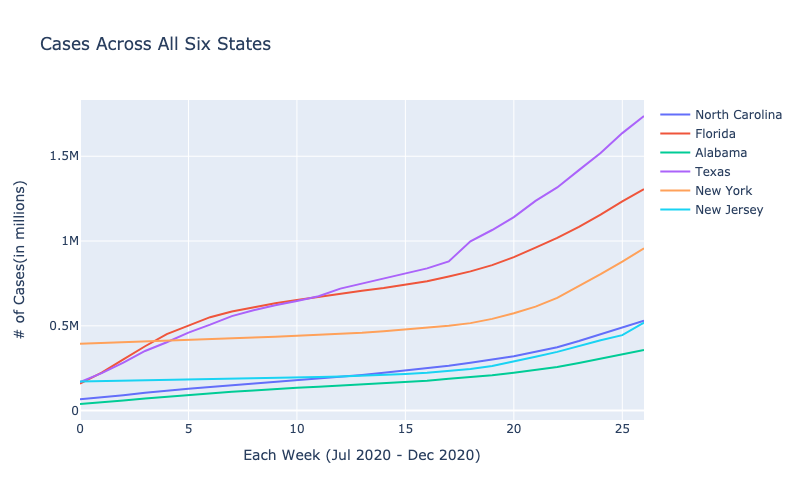

In [28]:
cases_states = pd.DataFrame({
    'North Carolina': weekly_cases_nc_data,
    'Florida': weekly_cases_fl_data,
    'Alabama': weekly_cases_al_data,
    'Texas': weekly_cases_tx_data,
    'New York': weekly_cases_ny_data,
    'New Jersey': weekly_cases_nj_data
})


fig = go.Figure()

for state in cases_states.columns:
    fig.add_trace(go.Scatter(x=cases_states.index, y=cases_states[state], mode='lines', name=state))

fig.update_layout(
    title='Cases Across All Six States',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Cases(in millions)'),
    showlegend=True,
    width=800,
    height=500 
)

fig.write_image("cases_across_states.png")
Image(filename="cases_across_states.png")

## Examine Population of States

In [29]:
population = pd.read_csv('../../Team/covid_county_population_usafacts.csv')

state_populations = population.groupby('State')['population'].sum()

sorted_states = state_populations.sort_values(ascending=False)

top_5_states = sorted_states.head(5)

print("The States with the most population,")
print("Top 5", top_5_states)

The States with the most population,
Top 5 State
CA    39512223
TX    28995881
FL    21477737
NY    19453561
PA    12801989
Name: population, dtype: int64


###  Describe why the Cases differ across these states? Identify the peaks

From the Graph, we observe that the highest number of cases on a week to week bases were in the State of Texas, Florida, and New York. After exmainging the population of each state, we see that Texas, Florida, and New York are in the Top 5 states with the most population. This shows us that the reason Texas, Florida, and New York experienced a high rise of cases so fast was due to their large population which became the reason for the rapid COVID-19 spread.

The graph shows us that Cases starting July were low throughout all States, but close to October and November there was a rise of cases in all states especially Texas, and all states reached their highest cases toward the end in December. This rise of cases can be described by the National holiday gatherings in October, November, and December as Halloween, Thanksgiving, and Christmas, respeectively. During these holidays, the gatherings are at their peak leading to a fast spread of COVID-19.

### Compare North Carolina Deaths against 5 other states

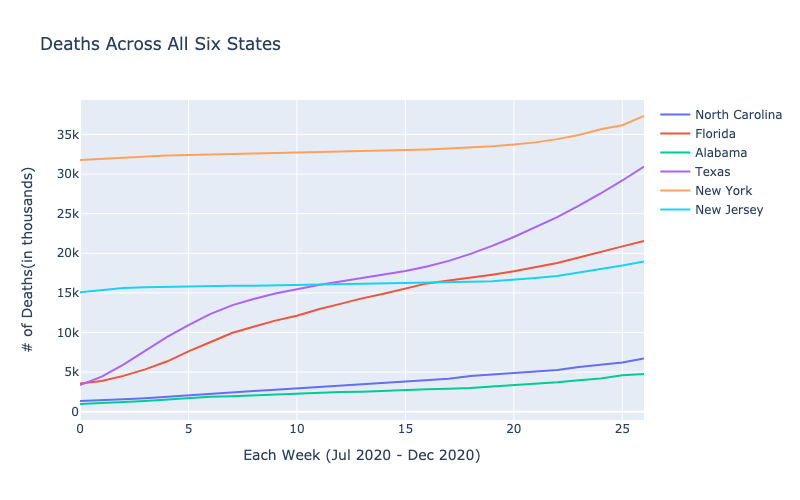

In [30]:
deaths_states = pd.DataFrame({
    'North Carolina': weekly_deaths_nc_data,
    'Florida': weekly_deaths_fl_data,
    'Alabama': weekly_deaths_al_data,
    'Texas': weekly_deaths_tx_data,
    'New York': weekly_deaths_ny_data,
    'New Jersey': weekly_deaths_nj_data
})


fig = go.Figure()

for state in deaths_states.columns:
    fig.add_trace(go.Scatter(x=deaths_states.index, y=deaths_states[state], mode='lines', name=state))

fig.update_layout(
    title='Deaths Across All Six States',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Deaths(in thousands)'),
    showlegend=True,
    width=800,
    height=500 
)

fig.write_image("deaths_across_states.png")
Image(filename="deaths_across_states.png")

###  Describe why the Deaths differ across these states?

Just as with Cases, from the Graph, we observe that the highest number of deaths were in the State of New York, Texas, and Florida. As backed by the population data, the reason these states - Texas, Florida, and New York - experienced a high rise of deaths so fast was due to their large population size and there being only a limited amount of medical resources.

The graph shows us that Deaths across most States were steady starting July, but the states of New York and New Jersey experienced a high death rate and this is due to the reason of high rates in homeless people. Poverty being a factor, sick people were unable to get proper medical care especiialy since there were so many of them. Limited medical resouces with a high rate of sick people led to a high death count in these states. 

# Identify five counties within North Carolina with high cases and death rates

## 5 counties with highest Cases in North Carolina

In [31]:
cases = pd.read_csv('../../Team/covid_confirmed_usafacts.csv')

selected_date_columns = [col for col in cases.columns if '2020-07-01' <= col <= '2020-12-31']
additional_columns = ["County Name", "State"]
selected_columns = additional_columns + selected_date_columns
selected_cases = cases[selected_columns]

nc_cases = selected_cases[selected_cases["State"] == "NC"]
nc_cases.head()

,County Name,State,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1923,Statewide Unallocated,NC,3,3,3,0,0,0,0,0,...,0,0,0,0,0,0,2,1,38,82
1924,Alamance County,NC,1151,1179,1207,1240,1274,1292,1309,1319,...,9509,9509,9509,9509,9509,9509,10120,10164,10274,10397
1925,Alexander County,NC,93,101,105,112,118,124,134,138,...,2367,2367,2367,2367,2367,2367,2526,2564,2642,2662
1926,Alleghany County,NC,32,36,36,36,37,37,37,37,...,558,558,558,558,558,558,611,619,633,638
1927,Anson County,NC,132,138,142,148,149,155,162,171,...,1284,1284,1284,1284,1284,1284,1380,1383,1402,1407


In [32]:
nc_cases.reset_index(drop=True, inplace=True)
nc_cases.head()

,County Name,State,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,Statewide Unallocated,NC,3,3,3,0,0,0,0,0,...,0,0,0,0,0,0,2,1,38,82
1,Alamance County,NC,1151,1179,1207,1240,1274,1292,1309,1319,...,9509,9509,9509,9509,9509,9509,10120,10164,10274,10397
2,Alexander County,NC,93,101,105,112,118,124,134,138,...,2367,2367,2367,2367,2367,2367,2526,2564,2642,2662
3,Alleghany County,NC,32,36,36,36,37,37,37,37,...,558,558,558,558,558,558,611,619,633,638
4,Anson County,NC,132,138,142,148,149,155,162,171,...,1284,1284,1284,1284,1284,1284,1380,1383,1402,1407


In [33]:
max_cases = {}
for i in range(0, nc_cases.shape[0]):
    row = nc_cases.iloc[i]
    numeric_values = row[row.apply(lambda x: pd.api.types.is_numeric_dtype(x))]
    total_cases = numeric_values.sum()
    county_name = row['County Name']
    max_cases[county_name] = total_cases

import heapq
top_5_counties_cases = heapq.nlargest(5, max_cases, key=max_cases.get)

print("Top 5 counties with high cases:")
print(top_5_counties_cases)

Top 5 counties with high cases:
['Mecklenburg County ', 'Wake County ', 'Guilford County ', 'Forsyth County ', 'Durham County ']


## 5 counties with highest Deaths in North Carolina

In [34]:
deaths = pd.read_csv("../../Team/covid_deaths_usafacts.csv")

selected_date_columns = [col for col in deaths.columns if '2020-07-01' <= col <= '2020-12-31']
additional_columns = ["County Name", "State"]
selected_columns = additional_columns + selected_date_columns
selected_deaths = deaths[selected_columns]

nc_deaths = selected_deaths[selected_deaths["State"] == "NC"]
nc_deaths.head()

,County Name,State,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1923,Statewide Unallocated,NC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1924,Alamance County,NC,37,37,37,37,37,37,37,37,...,114,114,114,114,114,114,117,117,117,117
1925,Alexander County,NC,1,1,1,1,1,1,1,1,...,26,26,26,26,26,26,29,30,30,30
1926,Alleghany County,NC,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
1927,Anson County,NC,1,1,1,1,1,1,1,1,...,19,19,19,19,19,19,23,23,26,26


In [35]:
nc_deaths.reset_index(drop=True, inplace=True)
nc_deaths.head()

,County Name,State,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
0,Statewide Unallocated,NC,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alamance County,NC,37,37,37,37,37,37,37,37,...,114,114,114,114,114,114,117,117,117,117
2,Alexander County,NC,1,1,1,1,1,1,1,1,...,26,26,26,26,26,26,29,30,30,30
3,Alleghany County,NC,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
4,Anson County,NC,1,1,1,1,1,1,1,1,...,19,19,19,19,19,19,23,23,26,26


In [36]:
max_deaths = {}
for i in range(0, nc_deaths.shape[0]):
    row = nc_deaths.iloc[i]
    numeric_values = row[row.apply(lambda x: pd.api.types.is_numeric_dtype(x))]
    total_deaths = numeric_values.sum()
    county_name = row['County Name']
    max_deaths[county_name] = total_deaths

import heapq
top_5_counties_deaths = heapq.nlargest(5, max_deaths, key=max_deaths.get)

print("Top 5 counties with death rates:")
print(top_5_counties_deaths)

Top 5 counties with death rates:
['Mecklenburg County ', 'Wake County ', 'Guilford County ', 'Forsyth County ', 'Gaston County ']


# Plot weekly trends (cases and deaths) for the top 5 infected counties

## Weekly trend in Cases for top 5 infected counties

In [37]:
nc_cases.set_index('County Name', inplace=True)
nc_cases.drop(columns='State', inplace=True)
nc_cases.head()

/var/folders/_m/rft3g50d1wgfkqjj9z_4vxd40000gn/T/ipykernel_23927/4213071226.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
County Name,,,,,,,,,,,,,,,,,,,,,
Statewide Unallocated,3,3,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,1,38,82
Alamance County,1151,1179,1207,1240,1274,1292,1309,1319,1357,1388,...,9509,9509,9509,9509,9509,9509,10120,10164,10274,10397
Alexander County,93,101,105,112,118,124,134,138,140,149,...,2367,2367,2367,2367,2367,2367,2526,2564,2642,2662
Alleghany County,32,36,36,36,37,37,37,37,39,41,...,558,558,558,558,558,558,611,619,633,638
Anson County,132,138,142,148,149,155,162,171,176,182,...,1284,1284,1284,1284,1284,1284,1380,1383,1402,1407


In [38]:
def plotWeeklyCases(county_name):
    county_data = nc_cases.loc[nc_cases.index == county_name]

    count = 0
    weekly_cases_trend = []
    
    for col in county_data.columns:
        count = count + 1
        if count % 7 == 0:
            weekly_cases_trend.append(county_data[col].values)
    
    weekly_cases_trend_data = [item for sublist in weekly_cases_trend for item in sublist]

    fig = px.line(x=list(range(len(weekly_cases_trend_data))), y=weekly_cases_trend_data,
                  labels={'y': 'Cases', 'x': 'Weeks'},
                  title=f'Weekly Cases Trend for {county_name}')

    fig.write_image(f'weekly_cases_trend_{county_name}.png')

In [39]:
for county in top_5_counties_cases:
    plotWeeklyCases(county)

In [40]:
def plotWeeklyCasesLog(county_name):
    county_data = nc_cases.loc[nc_cases.index == county_name]

    count = 0
    weekly_cases_trend = []
    
    for col in county_data.columns:
        count = count + 1
        if count % 7 == 0:
            weekly_cases_trend.append(county_data[col].values)
    
    weekly_cases_trend_data = [item for sublist in weekly_cases_trend for item in sublist]

    log_weekly_cases_trend_data = np.log1p(weekly_cases_trend_data)

    fig = px.line(x=list(range(len(log_weekly_cases_trend_data))), y=log_weekly_cases_trend_data,
                  labels={'y': 'Log(Cases)', 'x': 'Weeks'},
                  title=f'Weekly Log Cases Trend for {county_name}')

    fig.write_image(f'weekly_log_cases_trend_{county_name}.png')

In [41]:
for county in top_5_counties_cases:
    plotWeeklyCasesLog(county)

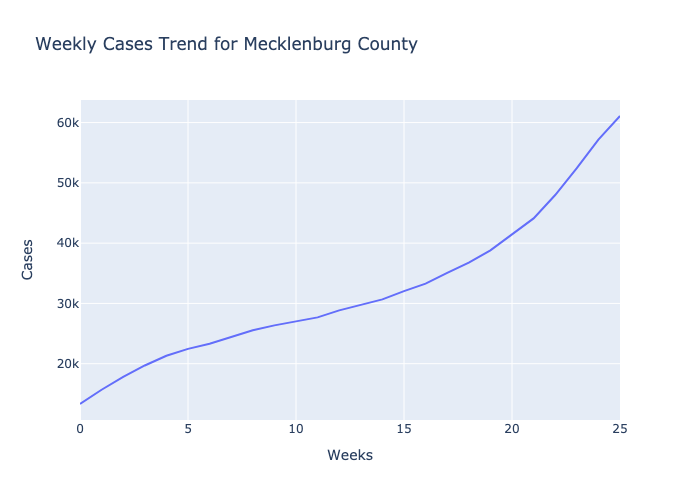

In [42]:
Image(filename="weekly_cases_trend_Mecklenburg County .png")

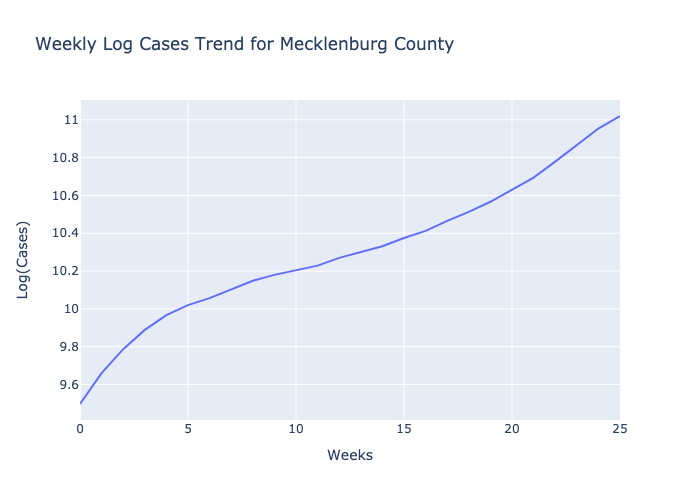

In [55]:
Image(filename="weekly_log_cases_trend_Mecklenburg County .png")

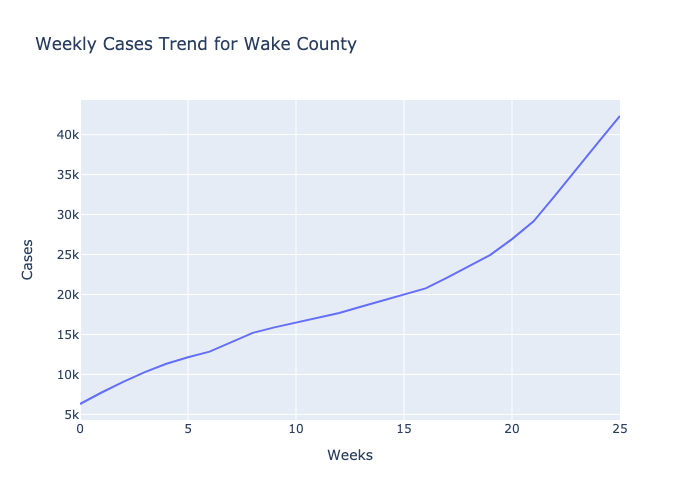

In [43]:
Image(filename="weekly_cases_trend_Wake County .png")

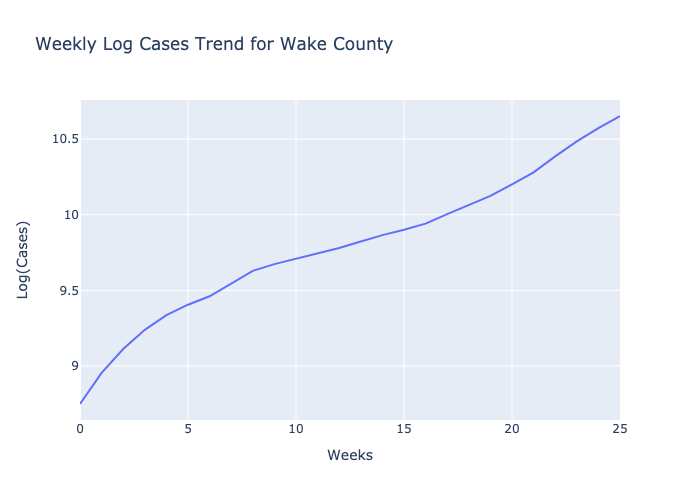

In [56]:
Image(filename="weekly_log_cases_trend_Wake County .png")

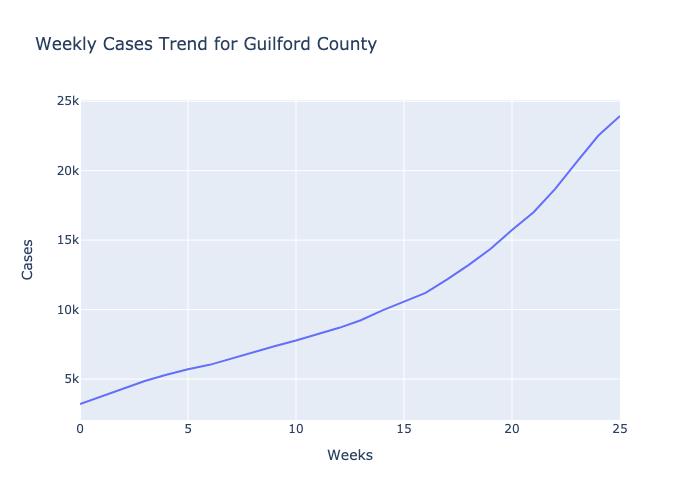

In [44]:
Image(filename="weekly_cases_trend_Guilford County .png")

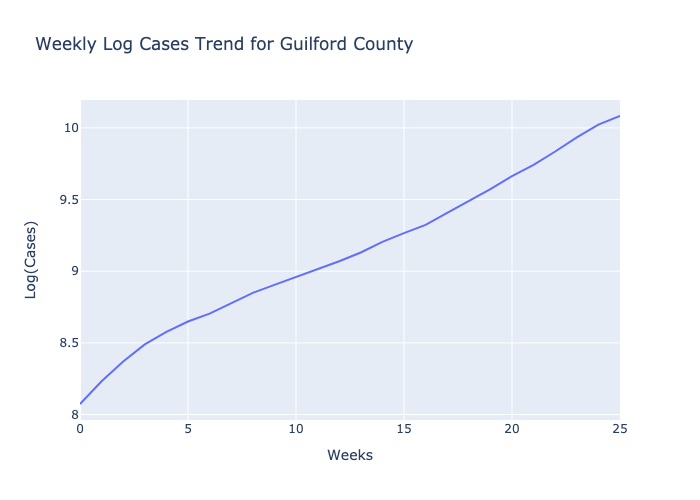

In [57]:
Image(filename="weekly_log_cases_trend_Guilford County .png")

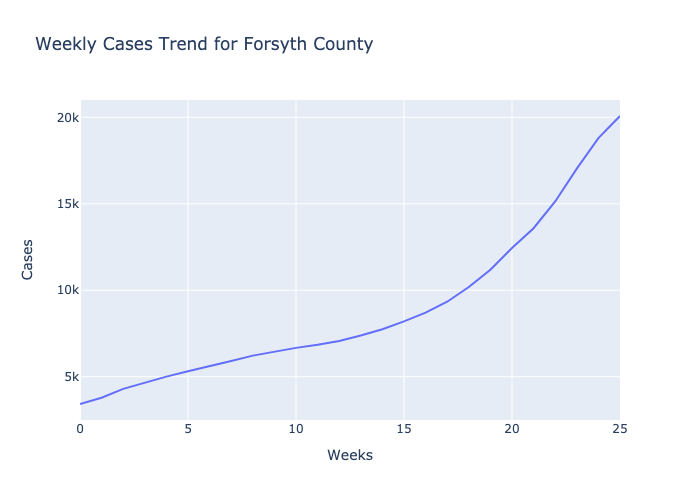

In [45]:
Image(filename="weekly_cases_trend_Forsyth County .png")

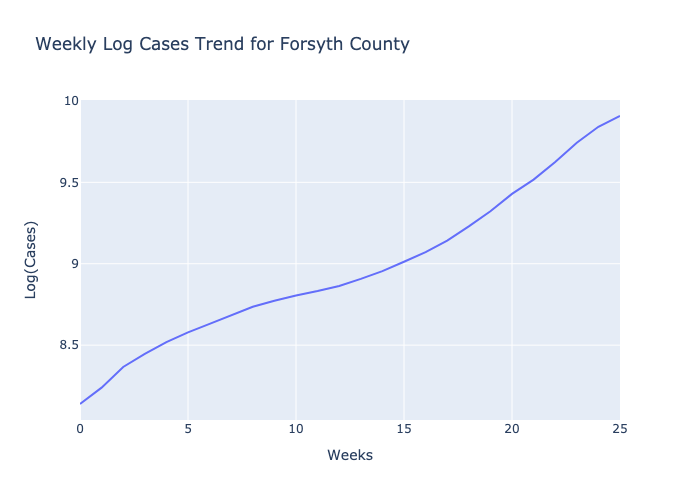

In [58]:
Image(filename="weekly_log_cases_trend_Forsyth County .png")

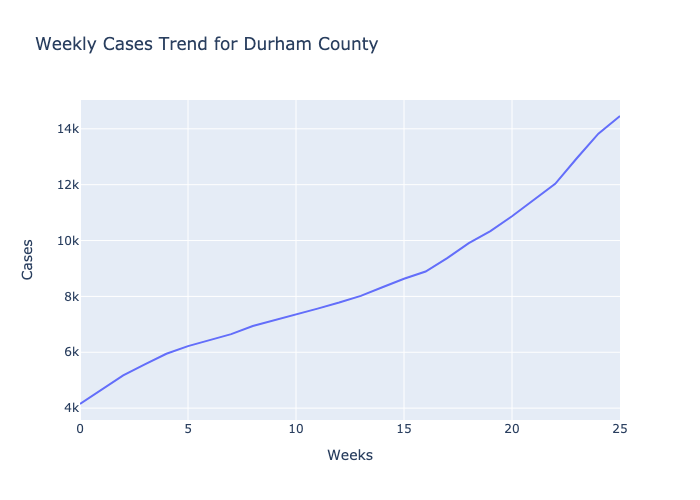

In [46]:
Image(filename="weekly_cases_trend_Durham County .png")

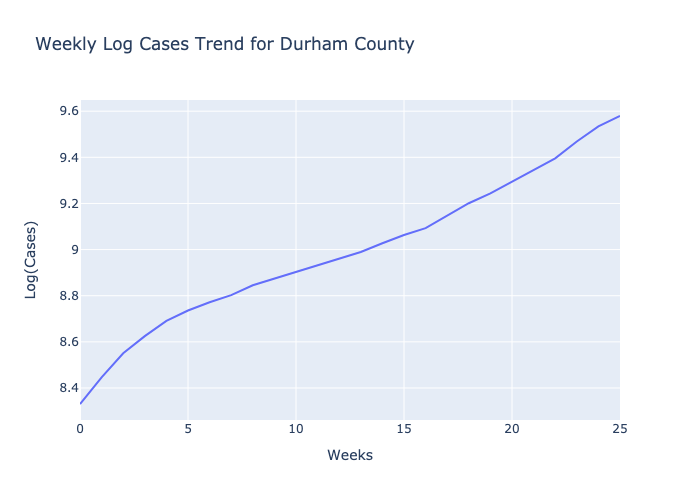

In [59]:
Image(filename="weekly_log_cases_trend_Durham County .png")

## Describe the Cases, what is causing them and what were the peaks. Do the counties follow state pattern?

For Cases, all 5 counties show the same pattern. From beginging July, the Cases are low and but around October, Novermber, and December there is a Peak and a Spike in Cases led by the spread of COVID-19 during holiday gatherings. Hence for Cases, the Counties of North Carolina show and follow same the pattern as of the state of North Carolina.

## Weekly trend in Deaths for top 5 infected counties

In [47]:
nc_deaths.set_index('County Name', inplace=True)
nc_deaths.drop(columns='State', inplace=True)
nc_deaths.head()

/var/folders/_m/rft3g50d1wgfkqjj9z_4vxd40000gn/T/ipykernel_23927/455691696.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
County Name,,,,,,,,,,,,,,,,,,,,,
Statewide Unallocated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alamance County,37,37,37,37,37,37,37,37,37,37,...,114,114,114,114,114,114,117,117,117,117
Alexander County,1,1,1,1,1,1,1,1,1,1,...,26,26,26,26,26,26,29,30,30,30
Alleghany County,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Anson County,1,1,1,1,1,1,1,1,1,1,...,19,19,19,19,19,19,23,23,26,26


In [48]:
def plotWeeklyDeaths(county_name):
    county_data = nc_deaths.loc[nc_deaths.index == county_name]

    count = 0
    weekly_deaths_trend = []
    
    for col in county_data.columns:
        count = count + 1
        if count % 7 == 0:
            weekly_deaths_trend.append(county_data[col].values)
    
    weekly_deaths_trend_data = [item for sublist in weekly_deaths_trend for item in sublist]

    fig = px.line(x=list(range(len(weekly_deaths_trend_data))), y=weekly_deaths_trend_data,
                  labels={'y': 'Deaths', 'x': 'Weeks'},
                  title=f'Weekly Deaths Trend for {county_name}')

    fig.write_image(f'weekly_deaths_trend_{county_name}.png')

In [49]:
for county in top_5_counties_deaths:
    plotWeeklyDeaths(county)

In [60]:
def plotWeeklyDeathsLog(county_name):
    county_data = nc_deaths.loc[nc_deaths.index == county_name]

    count = 0
    weekly_deaths_trend = []
    
    for col in county_data.columns:
        count = count + 1
        if count % 7 == 0:
            weekly_deaths_trend.append(county_data[col].values)
    
    weekly_deaths_trend_data = [item for sublist in weekly_deaths_trend for item in sublist]

    log_weekly_deaths_trend_data = np.log1p(weekly_deaths_trend_data)

    fig = px.line(x=list(range(len(log_weekly_deaths_trend_data))), y=log_weekly_deaths_trend_data,
                  labels={'y': 'Log(Deaths)', 'x': 'Weeks'},
                  title=f'Weekly Log Deaths Trend for {county_name}')

    # Save the plot as a static image
    fig.write_image(f'weekly_log_deaths_trend_{county_name}.png')

In [61]:
for county in top_5_counties_deaths:
    plotWeeklyDeathsLog(county)

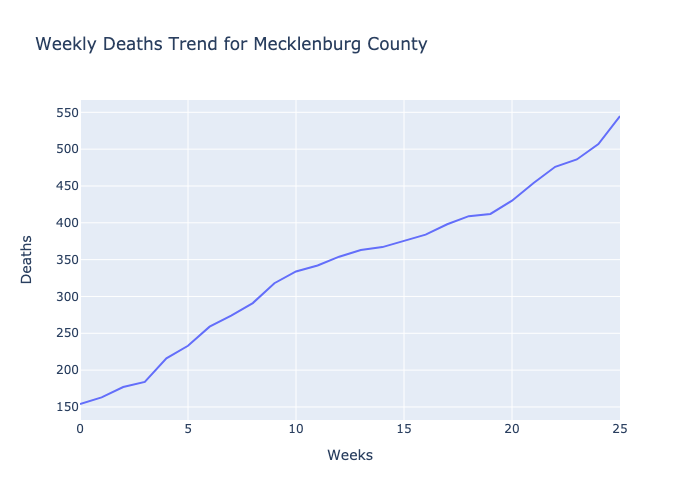

In [50]:
Image(filename="weekly_deaths_trend_Mecklenburg County .png")

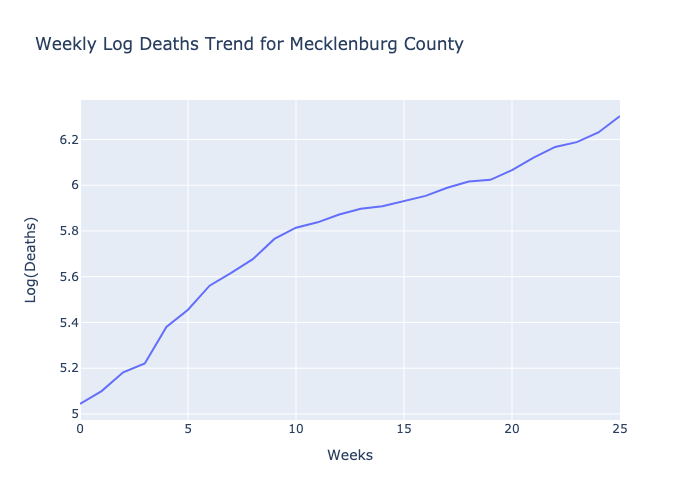

In [62]:
Image(filename="weekly_log_deaths_trend_Mecklenburg County .png")

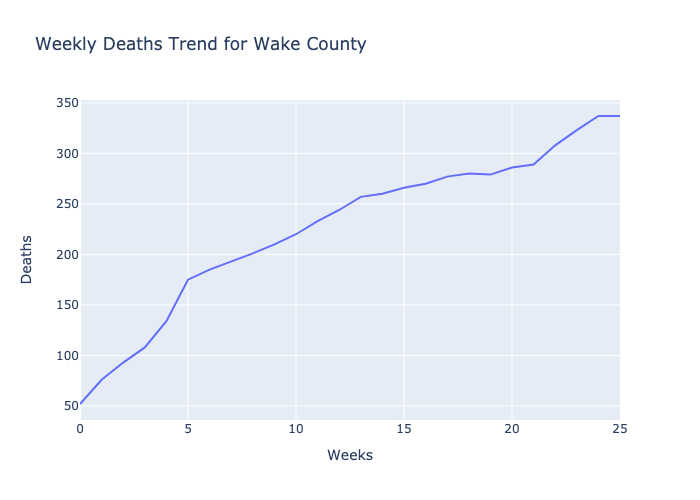

In [51]:
Image(filename="weekly_deaths_trend_Wake County .png")

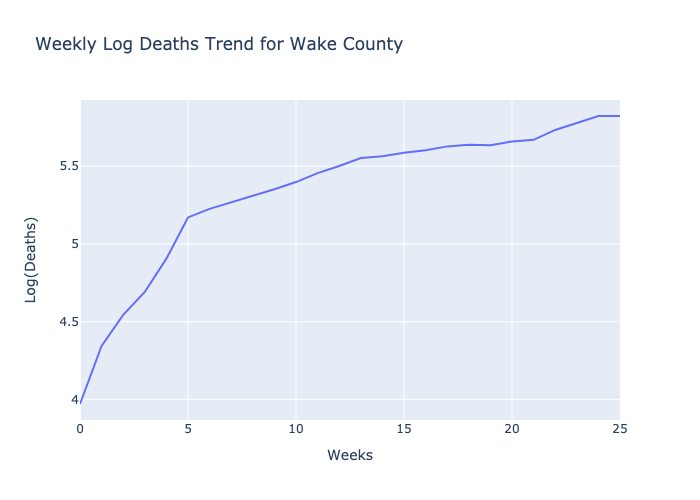

In [63]:
Image(filename="weekly_log_deaths_trend_Wake County .png")

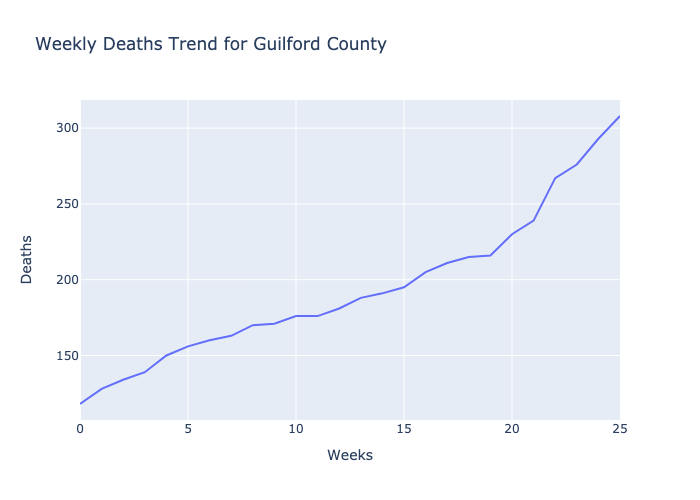

In [52]:
Image(filename="weekly_deaths_trend_Guilford County .png")

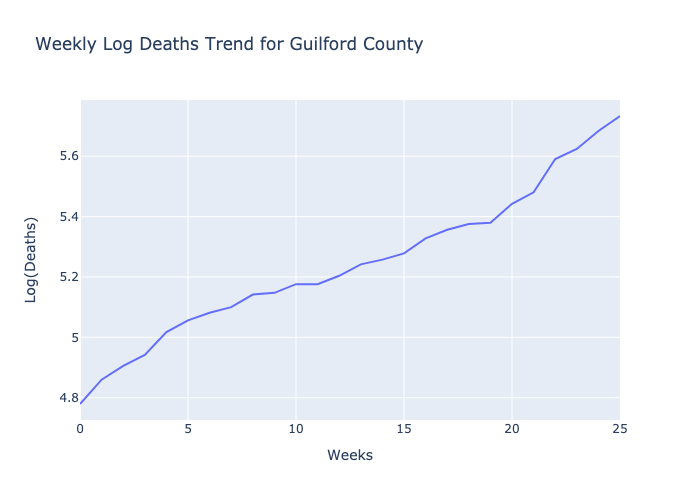

In [64]:
Image(filename="weekly_log_deaths_trend_Guilford County .png")

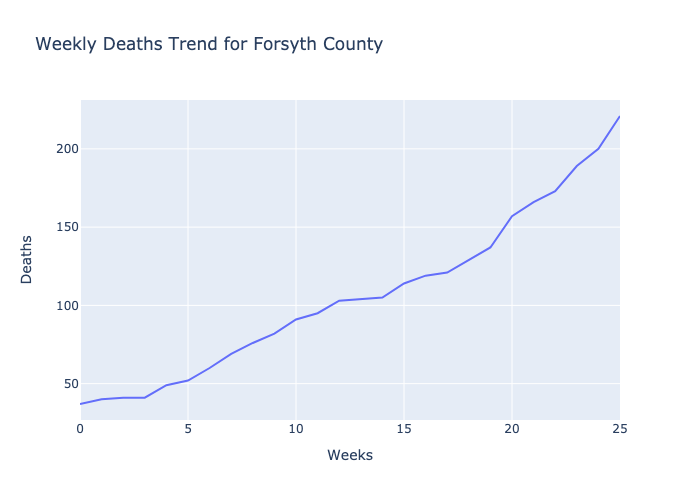

In [53]:
Image(filename="weekly_deaths_trend_Forsyth County .png")

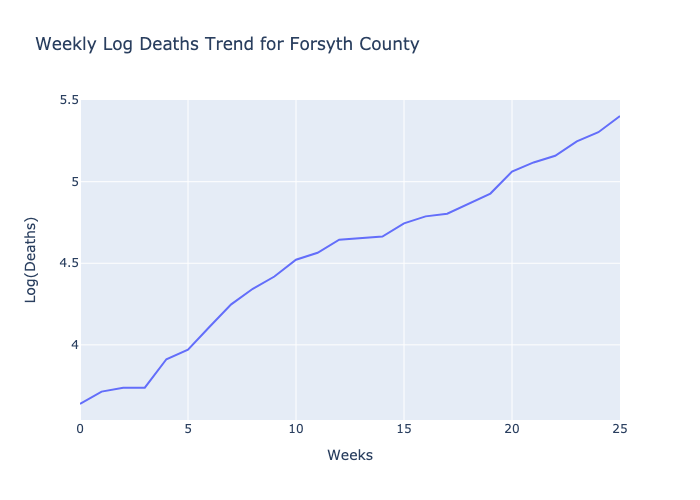

In [65]:
Image(filename="weekly_log_deaths_trend_Forsyth County .png")

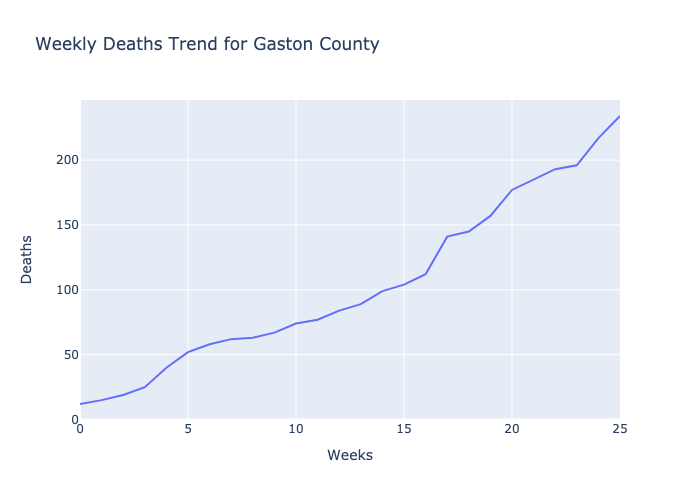

In [54]:
Image(filename="weekly_deaths_trend_Gaston County .png")

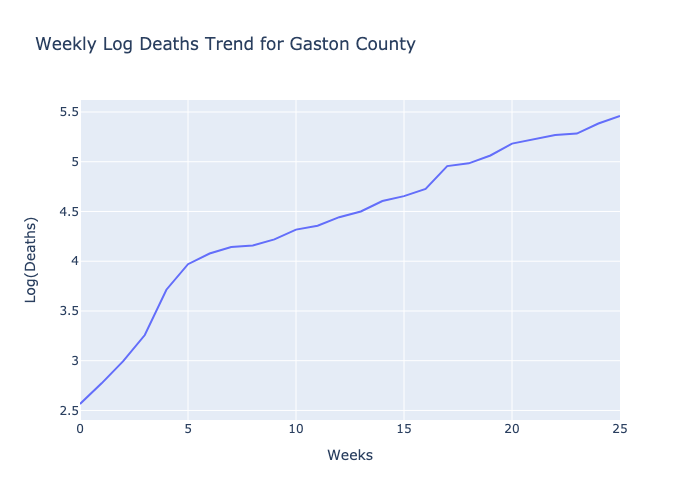

In [66]:
Image(filename="weekly_log_deaths_trend_Gaston County .png")

## Describe the Deaths, what is causing them and what were the peaks. Do the counties follow state pattern?

For Deaths, all 5 counties show the same pattern. From beginging July, the Deaths are low and but around October, Novermber, and December there is a Peak and a Spike in deaths led by the spread of COVID-19 during holiday gatherings. Hence for deaths, the Counties of North Carolina show and follow same the pattern as of the state of North Carolina.